In [64]:
# Kelly Ryan - 0347345         Surya Narayanan Thottathil Ravindranathan - 18104452
# The code executes to the end without error.

# Data Importation and Preprocessing

1. Import Iris dataset into a dataframe and check data format.

In [65]:
from IPython.core.display import display
import pandas as pd

# read iris data into pandas dataframe
iris = pd.read_csv("IRIS.csv", header = 0)

# display data
display(iris)

# check data types 
print("\n\nData Types:\n",iris.dtypes, "\n\n")

,sepal length cm,sepal width cm,petal length cm,petal width cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica




Data Types:
 sepal length cm    float64
sepal width cm     float64
petal length cm    float64
petal width cm     float64
species             object
dtype: object 




 2. Data Visualisation

Numerical Attribute Information:


,sepal length cm,sepal width cm,petal length cm,petal width cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
50%,5.800000,3.000000,4.350000,1.300000
max,7.900000,4.400000,6.900000,2.500000




Catgorical Information:


,species
count,150
unique,3
top,Iris-versicolor
freq,50


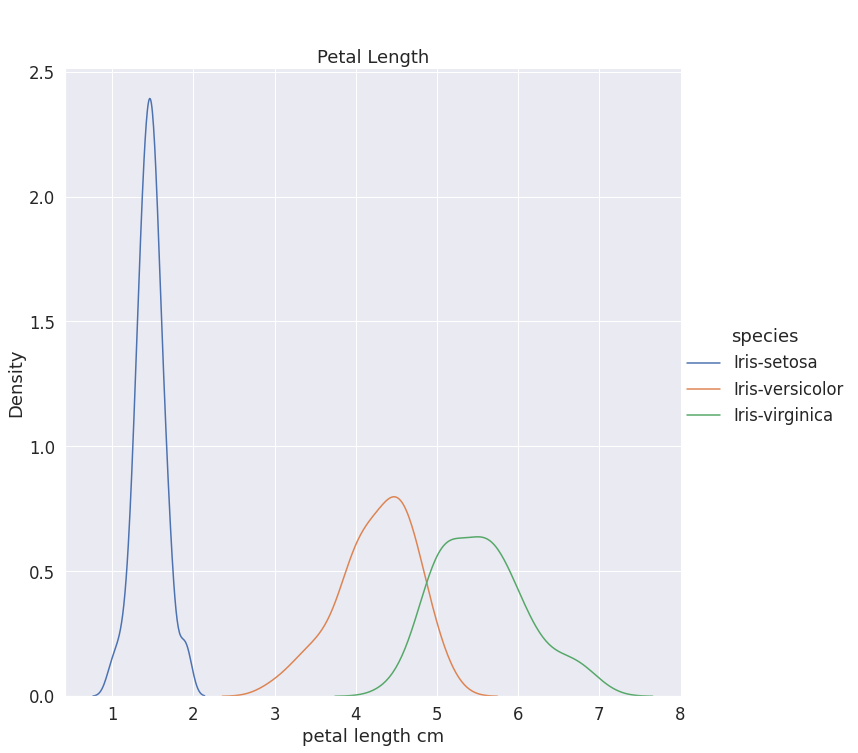

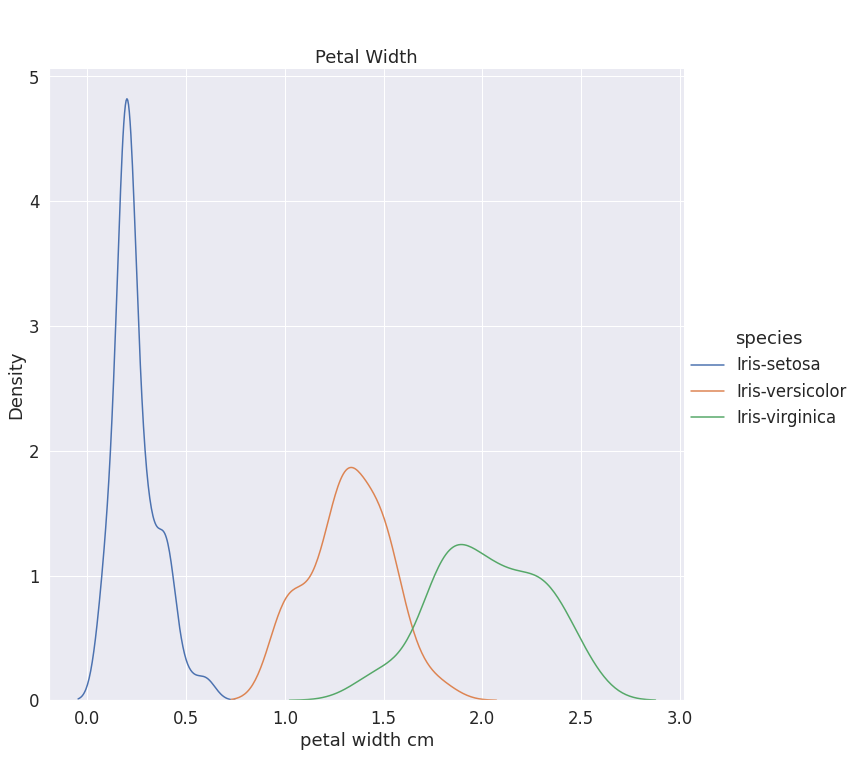

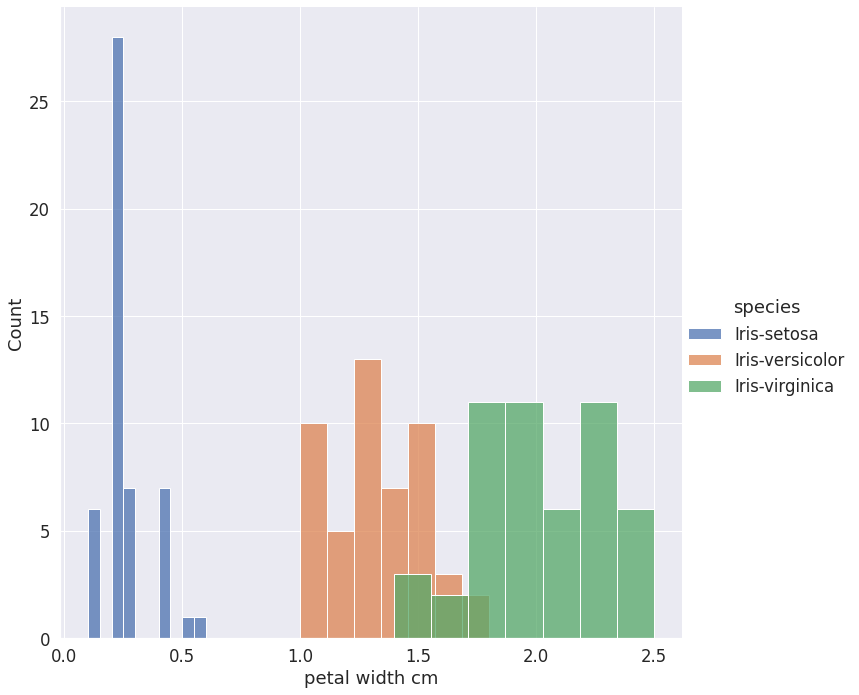

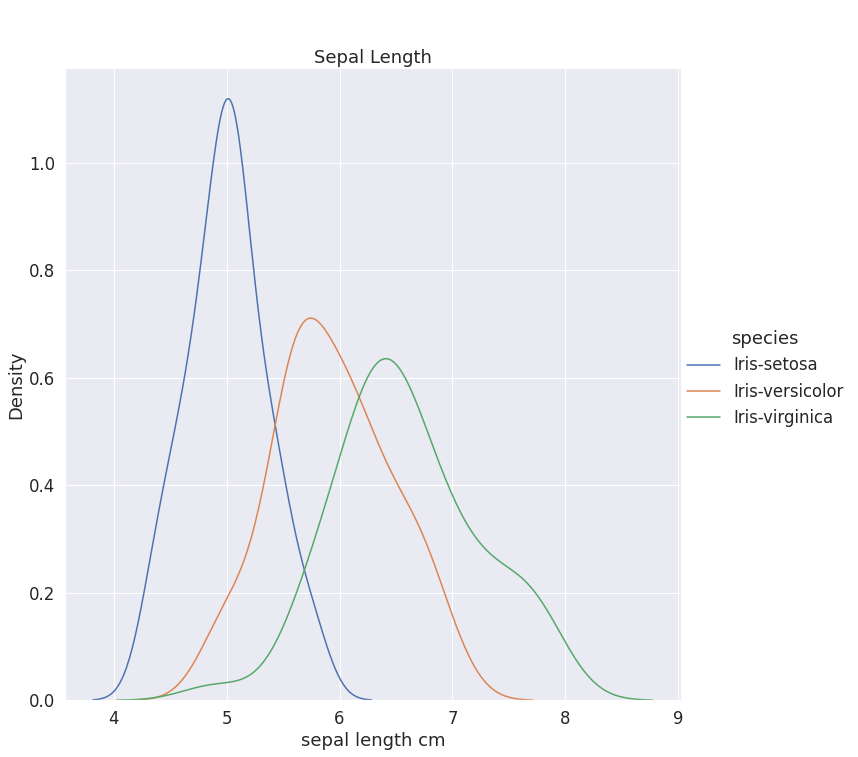

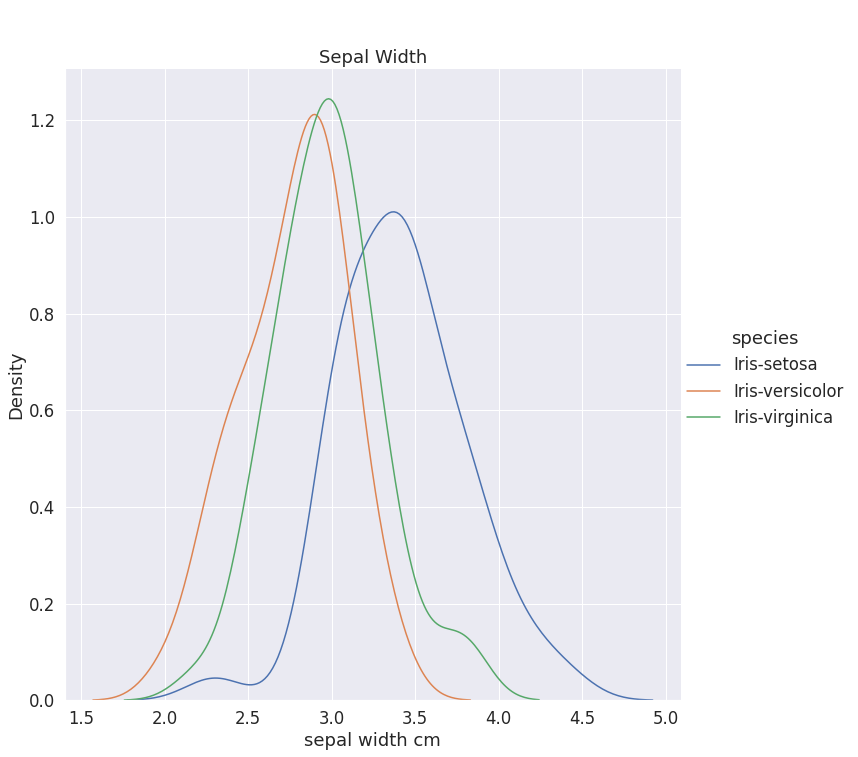

Text(0.5, 1.0, 'Sepal Width vs Petal Width')

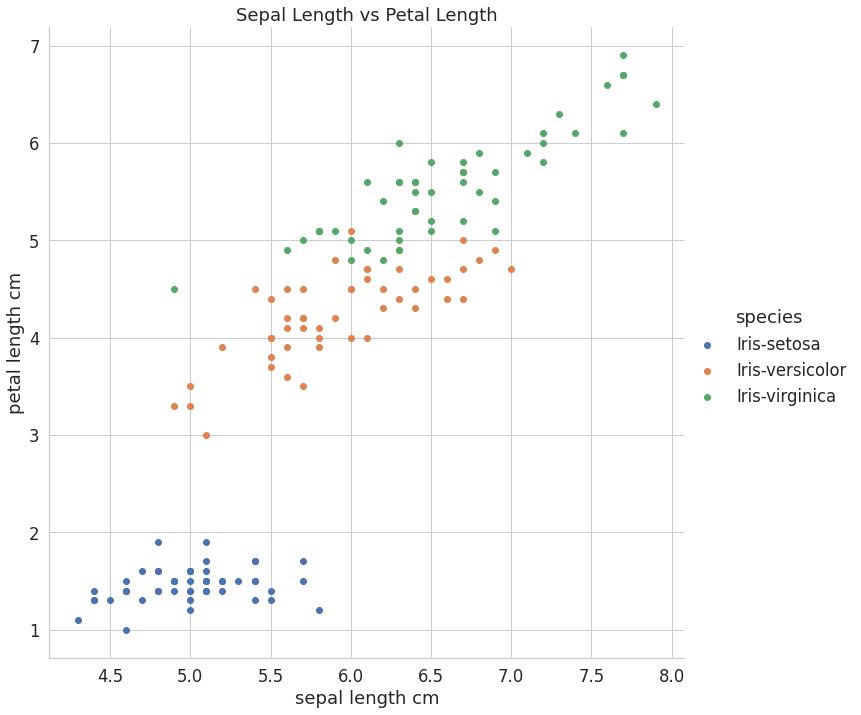

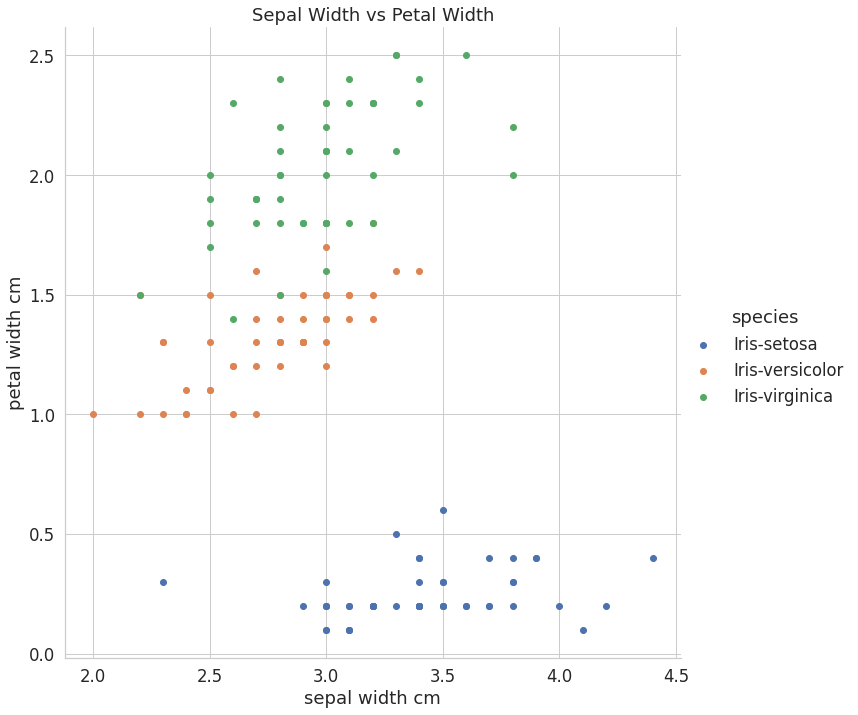

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Numerical Attribute Information:")
# calculate and display primary attribute information such as count, mean value, standard deviation and min/max values
display(iris.describe(percentiles=[]))

print("\n\nCatgorical Information:")
display(iris.describe(include=["object"]))

sns.set(font_scale = 1.5)

# plot petal/sepal lengths/widths using a KDE plot
sns.FacetGrid(iris, hue = "species", height = 10).map(sns.kdeplot, "petal length cm").add_legend()
plt.title("\n\nPetal Length")

sns.FacetGrid(iris, hue = "species", height = 10).map(sns.kdeplot, "petal width cm").add_legend()
plt.title("\n\nPetal Width")

sns.FacetGrid(iris,hue = "species", height = 10).map(sns.histplot,"petal width cm").add_legend()


sns.FacetGrid(iris, hue = "species", height = 10).map(sns.kdeplot, "sepal length cm").add_legend()
plt.title("\n\nSepal Length")

sns.FacetGrid(iris, hue = "species", height = 10).map(sns.kdeplot, "sepal width cm").add_legend()
plt.title("\n\nSepal Width")
plt.show() 


sns.set_style("whitegrid")
sns.FacetGrid(iris, hue = "species", height = 10).map(plt.scatter, 'sepal length cm','petal length cm').add_legend()
plt.title("Sepal Length vs Petal Length")

sns.set_style("whitegrid")
sns.FacetGrid(iris, hue = "species", height = 10).map(plt.scatter, 'sepal width cm','petal width cm').add_legend()
plt.title("Sepal Width vs Petal Width")

3. Normalise numerical data

In [67]:
import numpy as np

# create copy of iris dataframe in which to store normalised values and keep original dataframe
iris_unnormalized = iris
iris_normalized = iris.copy()

# isolate columns with numerical values
iris_num = iris.select_dtypes(include=[np.number])
# find max value in each column
col_maxes = iris_num.max()
# find overall max value among all columns
iris_num_max = col_maxes.max()
# divide all numerical values by overall max value in order to normalize data to a value between 0 and 1
iris_num_norm = iris_num / iris_num_max

# reassign normalised values back to their corresponding columns
iris_normalized[iris_num_norm.columns] = iris_num_norm

display("Normalized Dataset", iris_normalized)

'Normalized Dataset'

,sepal length cm,sepal width cm,petal length cm,petal width cm,species
0,0.645570,0.443038,0.177215,0.025316,Iris-setosa
1,0.620253,0.379747,0.177215,0.025316,Iris-setosa
2,0.594937,0.405063,0.164557,0.025316,Iris-setosa
3,0.582278,0.392405,0.189873,0.025316,Iris-setosa
4,0.632911,0.455696,0.177215,0.025316,Iris-setosa
...,...,...,...,...,...
145,0.848101,0.379747,0.658228,0.291139,Iris-virginica
146,0.797468,0.316456,0.632911,0.240506,Iris-virginica
147,0.822785,0.379747,0.658228,0.253165,Iris-virginica
148,0.784810,0.430380,0.683544,0.291139,Iris-virginica


4. Create training and test sets

In [68]:
import numpy as np

# specify seed for reproducibility
np.random.seed(1671)

# shuffle the dataset
iris_normalized = iris_normalized.iloc[np.random.permutation(len(iris_normalized))]

# split dataset to training and testing; 80% training and 20% testing
training = iris_normalized.sample(frac = 0.8)
testing = iris_normalized.drop(training.index)

# gives the number of rows in training and test
X_count = training.shape[0]
Y_count = testing.shape[0]

# initialize the training input and output list
# same for testing set
X_train = []
Y_train = []
X_test = []
Y_test = []

# loop through the dataframe and separate inputs and outputs for training and testing
for index, row in training.iterrows():
    X_train.append([row['sepal length cm'], row['sepal width cm'], row['petal length cm'], row['petal width cm']])
    Y_train.append([row['species']])

for index, row in testing.iterrows():
    X_test.append([row['sepal length cm'], row['sepal width cm'], row['petal length cm'], row['petal width cm']])
    Y_test.append([row['species']])

# convert to numpy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print("\nTraining and Test Datasets:\n")
print("\nX_train row[0]:\n", X_train[0], "\nShape:", X_train.shape)
print("\nY_train row[0]:\n", Y_train[0], "\nShape:", Y_train.shape)
print("\nX_test row[0]:\n", X_test[0], "\nShape:", X_test.shape)
print("\nY_test row[0]:\n", Y_test[0], "\nShape:", Y_test.shape)


Training and Test Datasets:


X_train row[0]:
 [0.87341772 0.39240506 0.6835443  0.26582278] 
Shape: (120, 4)

Y_train row[0]:
 ['Iris-virginica'] 
Shape: (120, 1)

X_test row[0]:
 [0.64556962 0.41772152 0.21518987 0.06329114] 
Shape: (30, 4)

Y_test row[0]:
 ['Iris-setosa'] 
Shape: (30, 1)


 5. One-hot encoding of labels

In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# use one-hot encoding to change format of labels/target values from ['Iris-virginica']['Iris-setosa']['Iris-versicolor'] to [0. 0. 1.] [1. 0. 0.] [0. 1. 0.]

def encode_labels(label_set):
    labels = label_set      # format: [['Iris-virginica']['Iris-setosa']['Iris-versicolor']]
    label_encoder = LabelEncoder()
    label_ids = label_encoder.fit_transform(labels)   # fit label encoder and return encoded labels in format: [0 1 2]
    reshaped = label_ids.reshape(len(label_ids), 1)   # reshape label_ids from  (120,)/(30,) to (120, 1) and (30, 1)
    onehot_encoder = OneHotEncoder(sparse=False)
    onehot=onehot_encoder.fit_transform(reshaped)     # fit onehot_encoder to reshaped labels and return transformed data in format: [[0. 0. 1.] [1. 0. 0.] [0. 1. 0.]]
    print("labels:", labels[0], "\tlabel_ids:", label_ids[0], "\tonehot:", onehot[0])
    return onehot

print("\nY_train:\n")
Y_train = encode_labels(Y_train)

print("\nY_test:\n")
Y_test = encode_labels(Y_test)


Y_train:

labels: ['Iris-virginica'] 	label_ids: 2 	onehot: [0. 0. 1.]

Y_test:

labels: ['Iris-setosa'] 	label_ids: 0 	onehot: [1. 0. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Implement MultiLayer Perceptron

6. K-Fold Cross Validation

In [70]:
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

# 4 inputs - petal length cm, petal width cm, sepal length cm, sepal width cm
INPUT = 4
N_HIDDEN = 128
NB_CLASSES = 3 # number of outputs/iris varieties
BATCH_SIZE = 2
VALIDATION_SPLIT = 0.2 # how much of the training set to to set aside for validation
EPOCHS = 200  # number of iterations through the training data

model = ""

#10 Fold Cross Validation
# Merge inputs and targets as cross validation will split the data
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((Y_train, Y_test), axis=0)

# Define k-fold cross validator
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
acc_per_fold = []
loss_per_fold = []

# model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    # Sequential groups a linear stack of layers into a model
    model = tf.keras.models.Sequential(
        [
          keras.layers.Dense(N_HIDDEN, input_shape = (INPUT,), name = "dense_layer1", activation = "relu"),
          keras.layers.Dense(N_HIDDEN, input_shape = (INPUT,), name = "dense_layer2", activation = "relu"),
          keras.layers.Dense(NB_CLASSES, input_shape = (INPUT,), name = "dense_layer3", activation = "softmax"),
        ]
    )
    #compiling the model
    model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])

    print(f'Training - fold {fold_no}...')
    #train the model
    training_history = model.fit(inputs[train], targets[train], batch_size=BATCH_SIZE, epochs = EPOCHS, verbose = 0, validation_split=VALIDATION_SPLIT, shuffle=True)

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f"Score - fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%")
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

# average scores
print("____________________________________________________________________")
print("Score:")
for i in range(0, len(acc_per_fold)):
  print("____________________________________________________________________")
  print(f"Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%")
print("____________________________________________________________________")
print("Average scores for all folds:")
print(f"Average Categorical Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})")
print(f"Average Loss: {np.mean(loss_per_fold)}")
print("____________________________________________________________________")

Training - fold 1...
Score - fold 1: loss of 0.21053873002529144; categorical_accuracy of 93.33333373069763%
Training - fold 2...
Score - fold 2: loss of 0.25949403643608093; categorical_accuracy of 86.66666746139526%
Training - fold 3...
Score - fold 3: loss of 0.007466920185834169; categorical_accuracy of 100.0%
Training - fold 4...
Score - fold 4: loss of 0.014159802347421646; categorical_accuracy of 100.0%
Training - fold 5...
Score - fold 5: loss of 0.05262679606676102; categorical_accuracy of 93.33333373069763%
Training - fold 6...
Score - fold 6: loss of 0.008475947193801403; categorical_accuracy of 100.0%
Training - fold 7...
Score - fold 7: loss of 0.06834842264652252; categorical_accuracy of 93.33333373069763%
Training - fold 8...
Score - fold 8: loss of 0.24024349451065063; categorical_accuracy of 86.66666746139526%
Training - fold 9...
Score - fold 9: loss of 0.0050871302373707294; categorical_accuracy of 100.0%
Training - fold 10...
Score - fold 10: loss of 0.0078268060460

7. Build and train model

Epoch 1/200
48/48 - 0s - loss: 0.0686 - categorical_accuracy: 0.9688 - val_loss: 0.0512 - val_categorical_accuracy: 0.9583
Epoch 2/200
48/48 - 0s - loss: 0.0895 - categorical_accuracy: 0.9688 - val_loss: 0.1426 - val_categorical_accuracy: 0.9583
Epoch 3/200
48/48 - 0s - loss: 0.0903 - categorical_accuracy: 0.9583 - val_loss: 0.0404 - val_categorical_accuracy: 1.0000
Epoch 4/200
48/48 - 0s - loss: 0.0686 - categorical_accuracy: 0.9583 - val_loss: 0.0394 - val_categorical_accuracy: 1.0000
Epoch 5/200
48/48 - 0s - loss: 0.0646 - categorical_accuracy: 0.9792 - val_loss: 0.0742 - val_categorical_accuracy: 0.9583
Epoch 6/200
48/48 - 0s - loss: 0.0889 - categorical_accuracy: 0.9583 - val_loss: 0.0488 - val_categorical_accuracy: 0.9583
Epoch 7/200
48/48 - 0s - loss: 0.0686 - categorical_accuracy: 0.9583 - val_loss: 0.0438 - val_categorical_accuracy: 0.9583
Epoch 8/200
48/48 - 0s - loss: 0.0638 - categorical_accuracy: 0.9583 - val_loss: 0.0423 - val_categorical_accuracy: 1.0000
Epoch 9/200
48/4

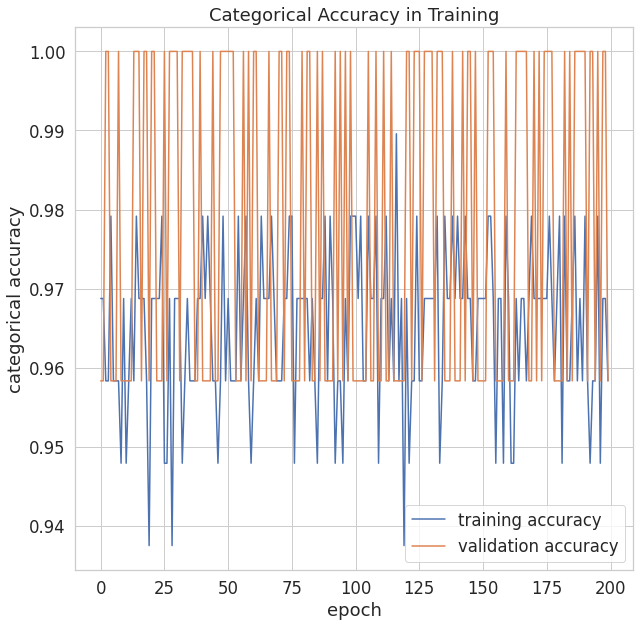

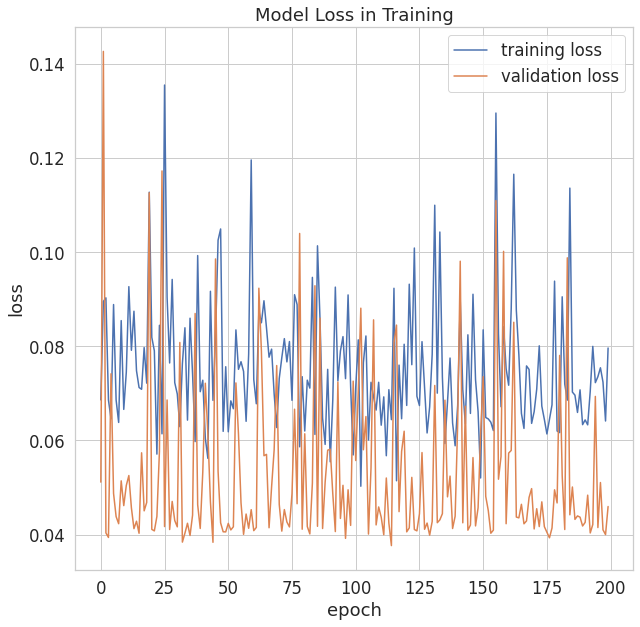

In [71]:
#train the model 
training_history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs = EPOCHS, verbose = 2, validation_split=VALIDATION_SPLIT, shuffle=True)

model.summary()

#evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print('Test Loss:', test_loss)
print('Test accuracy:', test_accuracy)

# Plot performance
plt.figure(figsize=(10,10))
plt.plot(training_history.history["categorical_accuracy"])
plt.plot(training_history.history["val_categorical_accuracy"])
plt.title('Categorical Accuracy in Training')
plt.ylabel('categorical accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.figure(figsize=(10,10))
plt.plot(training_history.history["loss"])
plt.plot(training_history.history["val_loss"])
plt.title('Model Loss in Training')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()
